<a href="https://colab.research.google.com/github/pawarashwin/Demo1/blob/main/jm_l2des.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understanding Descriptive Statistics with python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

descriptive statistics

In [ ]:
path="house_prices.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65,8450,7,5,2003,2003,196,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2008,208500
1,80,9600,6,8,1976,1976,0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,2007,181500
2,68,11250,7,5,2001,2002,162,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,2008,223500
3,60,9550,7,5,1915,1970,0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998,3,642,0,35,272,0,0,0,0,2006,140000
4,84,14260,8,5,2000,2000,350,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,2008,250000


In [ ]:
df.shape

(1379, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1379 non-null   float64
 1   LotArea        1379 non-null   int64  
 2   OverallQual    1379 non-null   int64  
 3   OverallCond    1379 non-null   int64  
 4   YearBuilt      1379 non-null   int64  
 5   YearRemodAdd   1379 non-null   int64  
 6   MasVnrArea     1379 non-null   float64
 7   BsmtFinSF1     1379 non-null   int64  
 8   BsmtFinSF2     1379 non-null   int64  
 9   BsmtUnfSF      1379 non-null   int64  
 10  TotalBsmtSF    1379 non-null   int64  
 11  1stFlrSF       1379 non-null   int64  
 12  2ndFlrSF       1379 non-null   int64  
 13  LowQualFinSF   1379 non-null   int64  
 14  GrLivArea      1379 non-null   int64  
 15  BsmtFullBath   1379 non-null   int64  
 16  BsmtHalfBath   1379 non-null   int64  
 17  FullBath       1379 non-null   int64  
 18  HalfBath

In [ ]:
saleprice = df['SalePrice']

m1=np.mean(saleprice)
print(m1)
mean=saleprice.mean()
median=saleprice.median()
mode=saleprice.mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])



185479.511240029
Mean:  185479.511240029 
Median:  167500.0 
Mode:  140000


Measures to find the spread of data

In [ ]:
saleprice.min() #maximum value of salePrice

35311

In [ ]:
saleprice.max() #minimum value of salePrice

755000

In [ ]:
#Range
saleprice.max()-saleprice.min()

719689

In [ ]:
#variance
saleprice.var()

6244775285.521462

In [ ]:
from math import sqrt

#standard deviation
std = sqrt(saleprice.var())
std

79023.8905997513

In [ ]:
t1=saleprice.std()
print(t1)

79023.8905997513


In [ ]:
#skewness
saleprice.skew()

1.935362098363132

In [ ]:
#kutosis
saleprice.kurt()

6.735649337267559

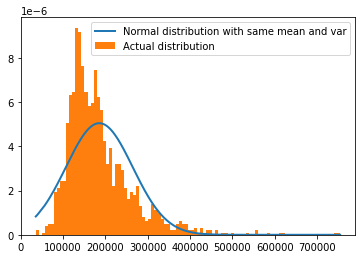

In [ ]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(df['SalePrice'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,density=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show() 

We can see int the above graph that it is positively skewed with skewness score 1.93 and also has positive kurtosis(k=6.735)

             LotArea  GrLivArea  GarageArea  SalePrice
LotArea     1.000000   0.257243    0.167622   0.252921
GrLivArea   0.257243   1.000000    0.478811   0.708172
GarageArea  0.167622   0.478811    1.000000   0.608405
SalePrice   0.252921   0.708172    0.608405   1.000000


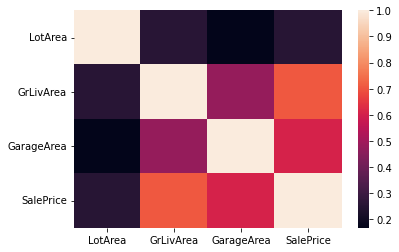

In [ ]:
#checking correlation of 4 countinous variables
import seaborn as sns
%matplotlib inline
corelation=df[['LotArea','GrLivArea','GarageArea','SalePrice']].corr()
print (corelation)

sns.heatmap(corelation)

In [ ]:
#covariance
df[['LotArea','GrLivArea','GarageArea','SalePrice']].cov().head()

,LotArea,GrLivArea,GarageArea,SalePrice
LotArea,1.043401e+08,1.364127e+06,3.179236e+05,2.041596e+08
GrLivArea,1.364127e+06,2.695069e+05,4.615466e+04,2.905241e+07
GarageArea,3.179236e+05,4.615466e+04,3.447726e+04,8.927251e+06
SalePrice,2.041596e+08,2.905241e+07,8.927251e+06,6.244775e+09


In [ ]:
# #50 percentile i.e median
# np.percentile(df['salary'], 50)

saleprice.quantile(0.5)

167500.0

In [ ]:
# q75 = np.percentile(df['salary'], 75)
# q75

q3 = saleprice.quantile(0.75)
q3

217750.0

In [ ]:
#25th percentile
# q25 = np.percentile(df['salary'], 25)
q1 = saleprice.quantile(0.25)
q1

134000.0

In [ ]:
#interquartile range
IQR = q3  - q1
IQR

83750.0

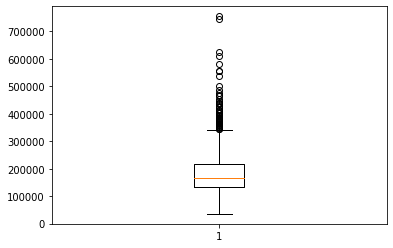

In [ ]:
plt.boxplot(saleprice)
plt.show()